<a href="https://colab.research.google.com/github/prnishtala/ExternalInternshipProgram/blob/master/Assignment5/Final_Submission_EIP3Phase2_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries and Installing Dependencies

In [0]:
from keras.layers import GlobalAveragePooling2D,Activation,Flatten,Conv2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import image
import keras.backend as K
import cv2

import numpy as np
import pandas as pd
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [40]:
pip install image-classifiers

In [41]:
pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-6k19mfh1
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-6k19mfh1
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-4adbqs6b/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


### Loading pre-trained Resnet Model on Imagenet

In [0]:
from classification_models.resnet import ResNet18, preprocess_input

model = ResNet18((32, 32, 3), weights='imagenet', include_top=False)

In [43]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

### Changing the architecture to work on CIFAR 10

In [0]:
num_classes = 10
batch_size = 128
epochs = 10

In [46]:
final_layer = model.output
final_layer = Conv2D(1024, (3,3), strides=(1,1), use_bias=False, border_mode='same')(final_layer)
final_layer = Conv2D(512, (3,3), strides=(1,1), use_bias=False, border_mode='same')(final_layer)
final_layer = Conv2D(256, (3,3), strides=(1,1), use_bias=False, border_mode='same')(final_layer)
final_layer = Conv2D(num_classes, (1,1), strides=(1,1), use_bias=False)(final_layer)
final_layer = GlobalAveragePooling2D()(final_layer)
final_layer = Activation('softmax')(final_layer)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1024, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), strides=(1, 1), use_bias=False, padding="same")`
  after removing the cwd from sys.path.


In [0]:
my_model = Model(inputs=model.input, outputs=final_layer)

In [49]:
my_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_19 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_19[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
my_model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

### Training the pretrained model on CIFAR 10

In [0]:
# CIFAR10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Importing CIFAR10 dataset from Keras.
from keras.datasets import cifar10

# Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

# Setting the count, number of channels, rows and columns of training images
num_train, img_channels, img_rows, img_cols =  train_data.shape

# Setting the count of test images
num_test, _, _, _ =  test_data.shape

# Setting number of classes (10)
num_classes = len(np.unique(train_labels))

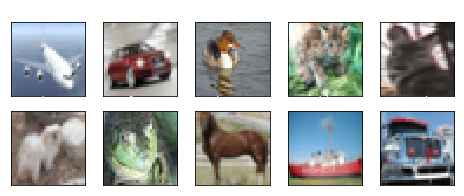

In [52]:
# Setting up the class names
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Plotting an image from each of the 10 classes
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_data[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i], color='white')
    plt.imshow(im)
plt.show()

In [0]:
# Pixel normalization for training images
train_data = train_data.astype('float32')/255

# Pixel normalization for test images
test_data = test_data.astype('float32')/255

# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [54]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Specifying the path to store the weights
filepath="/content/gdrive/My Drive/EIP Assignment 5/Model:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

In [0]:
my_model.fit(train_data, train_labels,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(test_data, test_labels),
              shuffle=False,
              callbacks=[checkpoint])

W0712 18:48:31.618741 140232255506304 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 37s 747us/step - loss: 1.6069 - acc: 0.4752 - val_loss: 1.1060 - val_acc: 0.6105

Epoch 00001: val_acc improved from -inf to 0.61050, saving model to /content/gdrive/My Drive/EIP Assignment 5/Model:001-val_acc:0.611.hdf5
Epoch 2/10
50000/50000 [==============================] - 28s 570us/step - loss: 0.9326 - acc: 0.6692 - val_loss: 0.8440 - val_acc: 0.7068

Epoch 00002: val_acc improved from 0.61050 to 0.70680, saving model to /content/gdrive/My Drive/EIP Assignment 5/Model:002-val_acc:0.707.hdf5
Epoch 3/10
50000/50000 [==============================] - 29s 579us/step - loss: 0.7222 - acc: 0.7462 - val_loss: 0.7561 - val_acc: 0.7391

Epoch 00003: val_acc improved from 0.70680 to 0.73910, saving model to /content/gdrive/My Drive/EIP Assignment 5/Model:003-val_acc:0.739.hdf5
Epoch 4/10
50000/50000 [==============================] - 29s 576us/step - loss: 0.5860 - acc: 0.7938 - val

In [0]:
#Loading the best weights for prediction
my_model.load_weights('/content/gdrive/My Drive/EIP Assignment 5/Model:007-val_acc:0.763.hdf5')

### Finding and Plotting 50 Misclassified Images

In [0]:
def findMisclassifiedImages():
  (train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
  
  # Pixel normalization for test images
  test_data = test_data.astype('float32')/255

  y_pred = my_model.predict(test_data)
  y_pred = np.argmax(y_pred, axis=1)
   
  test_labels = test_labels.reshape(test_labels.shape[0],)
  
  misclassified = np.nonzero(y_pred != test_labels)
  
  misclassified50 = misclassified[0][0:50]
  
  result = [{"Predicted_Values": y_pred, "Misclassified_Images": misclassified50}]
  
  return result

In [0]:
misclassified_images = findMisclassifiedImages()

In [0]:
misclassified50 = misclassified_images[0]['Misclassified_Images']

In [0]:
y_pred = misclassified_images[0]['Predicted_Values']

In [0]:
#Function to get actual class names
def getClassName(classNumber):
  for i in range(len(class_names)):
    if(classNumber == i):
      className = class_names[i]
  return className

In [0]:
def plotMisclassifiedImages(misclassifiedImages, predictedValues):
  # Loading the CIFAR10 60000 Training and 10000 Test data into respective numpy arrays
  (train_data, train_labels), (test_data, test_labels) = cifar10.load_data()
  
  fig = plt.figure(figsize = (25,25)) 
  plots = []
  count = 0
  for i in range(5):
    for j in range(10):
        ax = plt.subplot2grid((10,10), (i,j))
        plt.imshow(test_data[misclassifiedImages[count]].reshape(32,32,3),cmap='gray',interpolation='none')
        fig.suptitle('50 Misclassified Images (Actual/Predicted Labels)', fontsize = 20, color= 'white')
        plt.title("A: {}, P: {}".format(getClassName(test_labels[misclassifiedImages[count]]), getClassName(predictedValues[misclassifiedImages[count]])), color = 'white')
        count = count+1
  plt.show()

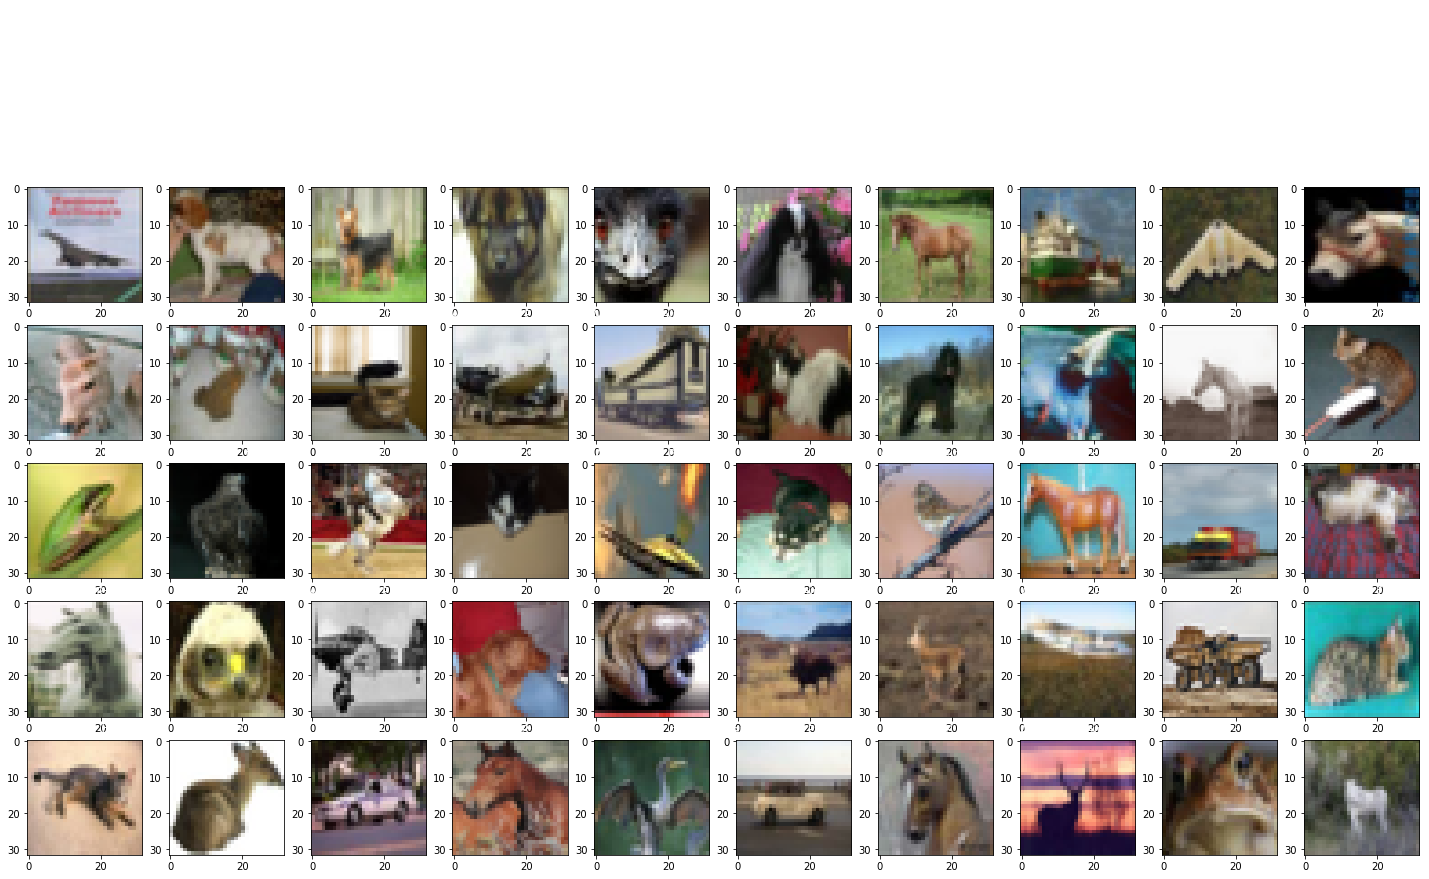

In [64]:
plotMisclassifiedImages(misclassified50, y_pred)

### GradCAM output on Misclassified Images

In [0]:
#Function to plot original image and GradCAM image
def gradCAMImpl(misclassified50):
  k = 0
  
  for i in range(5):
    for j in range(10):
      (train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

      test_data = test_data.astype('float32')/255

      test_labels = np_utils.to_categorical(test_labels, num_classes)
      
      img = test_data[misclassified50[k]]
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

      preds = my_model.predict(x)
      class_idx = np.argmax(preds[0])
      class_output = my_model.output[:, class_idx]
      last_conv_layer = my_model.get_layer("stage2_unit1_conv1")

      grads = K.gradients(class_output, last_conv_layer.output)[0]
      pooled_grads = K.mean(grads, axis=(0, 1, 2))
      iterate = K.function([my_model.input], [pooled_grads, last_conv_layer.output[0]])
      pooled_grads_value, conv_layer_output_value = iterate([test_data])
      
      for i in range(128):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)

      (train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

      img = test_data[misclassified50[k]]
      heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
      heatmap = np.uint8(255 * heatmap)
      heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
      superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

      fig = plt.figure(figsize = (14,40)) 
      sub = fig.add_subplot(10, 5, (k + 1))
      vis = np.concatenate((img, superimposed_img), axis=0)
      sub.imshow(vis, interpolation='bilinear')
      plt.title("Actual: " + getClassName(test_labels[misclassified50[k]])+"    Predicted: " + getClassName(class_idx), color = 'white')
      k += 1  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


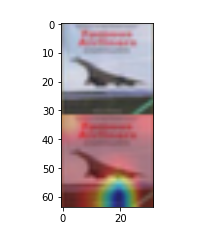

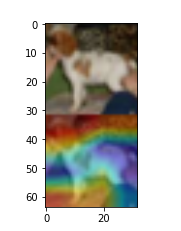

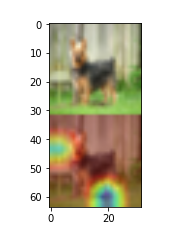

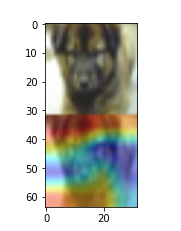

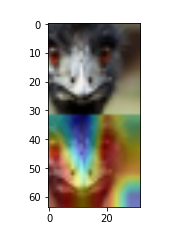

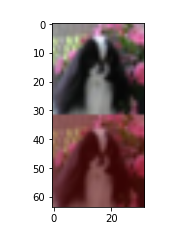

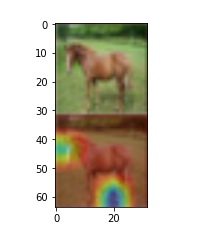

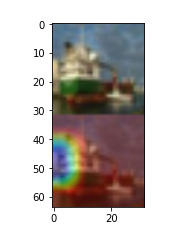

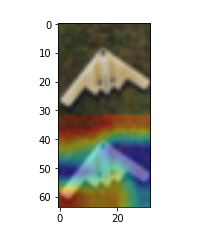

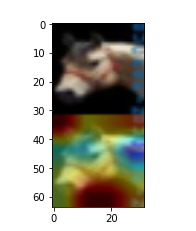

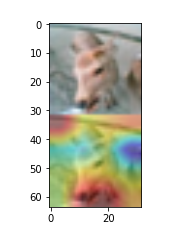

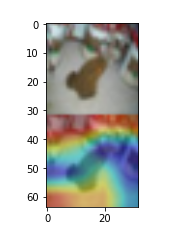

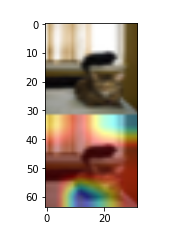

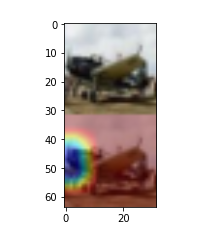

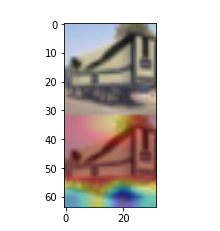

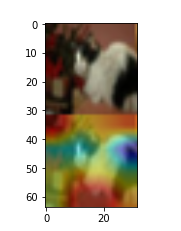

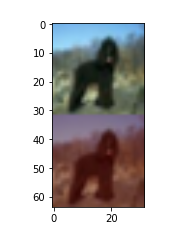

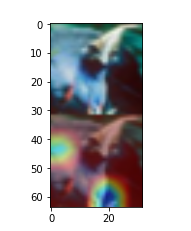

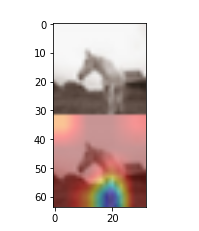

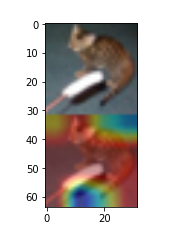

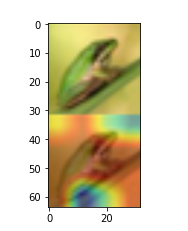

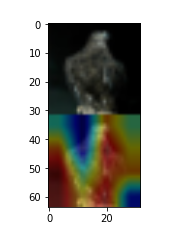

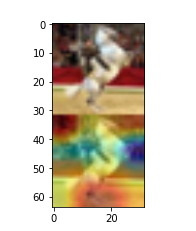

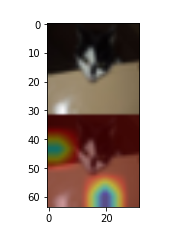

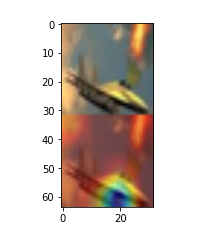

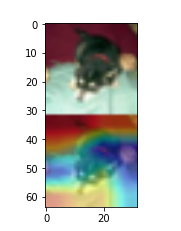

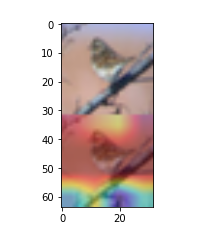

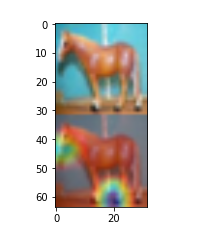

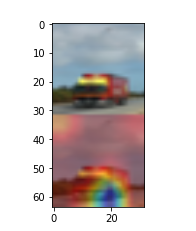

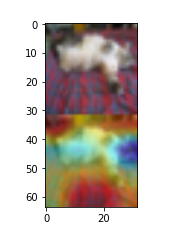

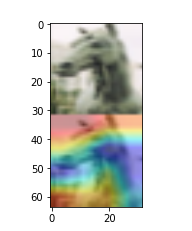

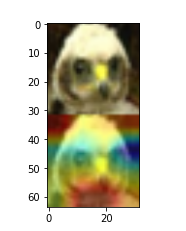

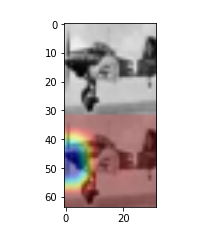

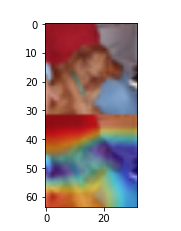

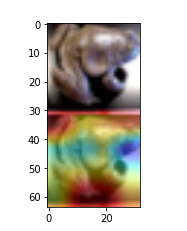

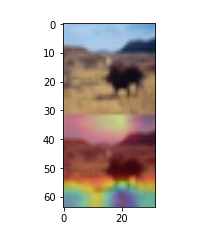

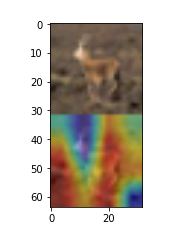

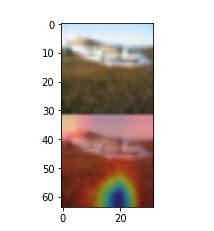

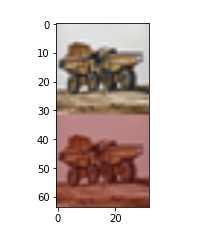

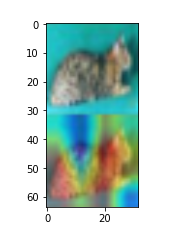

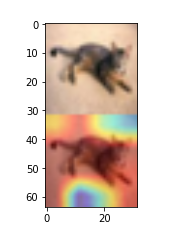

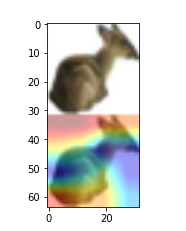

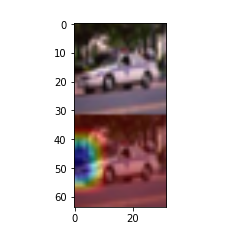

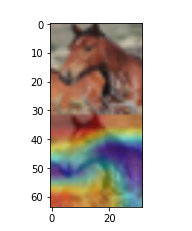

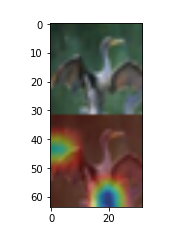

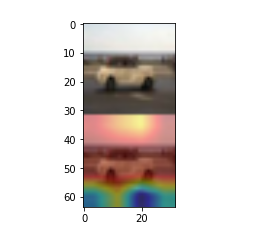

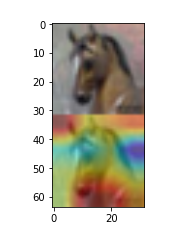

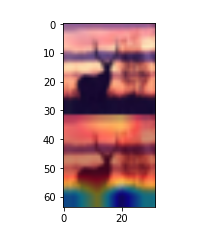

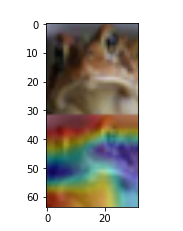

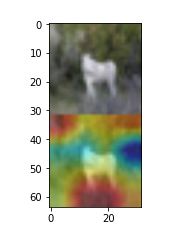

In [68]:
gradCAMImpl(misclassified50)